In [1]:
import seaborn as sb
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import tensorflow as tf
from tensorflow import keras

In [2]:
df=pd.read_csv("C://SEM08//FDS//datasets//onlinefraud.csv")
df

# Display first 5 rows
print("First 5 rows:")
print(df.head())

# Display last 5 rows
print("\nLast 5 rows:")
print(df.tail())

# Display a random sample of 5 rows
print("\nRandom Sample:")
print(df.sample(5))


First 5 rows:
   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0  

Last 5 rows:
         step      type     amount     nameOrig  oldbalanceOrg  \
1048570    

In [3]:
# Display the shape of the dataset
print("Dataset Shape:", df.shape)

Dataset Shape: (1048575, 11)


In [4]:
# Display data types of each column
print(df.dtypes)

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object


In [5]:
# Display column names
print(df.columns)


Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')


In [6]:
# Get statistical summary
summary = df.describe()
print(summary.T)

                    count          mean           std  min        25%  \
step            1048575.0  2.696617e+01  1.562325e+01  1.0     15.000   
amount          1048575.0  1.586670e+05  2.649409e+05  0.1  12149.065   
oldbalanceOrg   1048575.0  8.740095e+05  2.971751e+06  0.0      0.000   
newbalanceOrig  1048575.0  8.938089e+05  3.008271e+06  0.0      0.000   
oldbalanceDest  1048575.0  9.781600e+05  2.296780e+06  0.0      0.000   
newbalanceDest  1048575.0  1.114198e+06  2.416593e+06  0.0      0.000   
isFraud         1048575.0  1.089097e-03  3.298351e-02  0.0      0.000   
isFlaggedFraud  1048575.0  0.000000e+00  0.000000e+00  0.0      0.000   

                      50%          75%         max  
step                20.00       39.000        95.0  
amount           76343.33   213761.890  10000000.0  
oldbalanceOrg    16002.00   136642.020  38900000.0  
newbalanceOrig       0.00   174599.990  38900000.0  
oldbalanceDest  126377.21   915923.475  42100000.0  
newbalanceDest  218260.3

In [7]:
# 1. Check dataset information (columns, data types, non-null counts)
print("Dataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  object 
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
 10  isFlaggedFraud  1048575 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 88.0+ MB
None


In [8]:
# 2. Check for missing values (null values)
print("\nMissing Values:")
print(df.isnull().sum())



Missing Values:
step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


In [9]:
# 3. Check for duplicate rows
print("\nDuplicate Rows Count:")
print(df.duplicated().sum())


Duplicate Rows Count:
0


In [10]:
# Select only numerical columns
numerical_columns = df.select_dtypes(include=['number'])

# Calculate skewness for numerical columns
skewness = numerical_columns.skew()

# Display skewness values
print("Skewness of Numerical Features:\n", skewness)

Skewness of Numerical Features:
 step               1.294455
amount             6.374166
oldbalanceOrg      5.124286
newbalanceOrig     5.060456
oldbalanceDest     5.373195
newbalanceDest     5.012456
isFraud           30.252198
isFlaggedFraud     0.000000
dtype: float64


<>:15: SyntaxWarning: invalid escape sequence '\m'
<>:15: SyntaxWarning: invalid escape sequence '\s'
<>:15: SyntaxWarning: invalid escape sequence '\m'
<>:15: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Yash Shah\AppData\Local\Temp\ipykernel_7396\4025046956.py:15: SyntaxWarning: invalid escape sequence '\m'
  plt.plot(x, p, "r", label=f"Normal Fit ($\mu$={mu:.2f}, $\sigma$={std:.2f})")
C:\Users\Yash Shah\AppData\Local\Temp\ipykernel_7396\4025046956.py:15: SyntaxWarning: invalid escape sequence '\s'
  plt.plot(x, p, "r", label=f"Normal Fit ($\mu$={mu:.2f}, $\sigma$={std:.2f})")


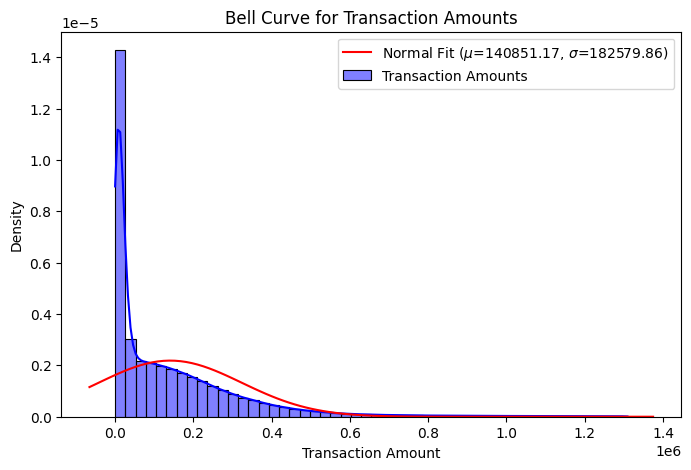

In [11]:
from scipy.stats import norm

# Filter data for better visualization (e.g., remove extreme outliers)
filtered_amount = df["amount"][df["amount"] < df["amount"].quantile(0.99)]

# Plot histogram with KDE
plt.figure(figsize=(8,5))
sns.histplot(filtered_amount, bins=50, kde=True, color="blue", stat="density", label="Transaction Amounts")

# Fit a normal distribution to the data
mu, std = norm.fit(filtered_amount)  # Calculate mean and standard deviation
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)  # Get the probability density function
plt.plot(x, p, "r", label=f"Normal Fit ($\mu$={mu:.2f}, $\sigma$={std:.2f})")

# Add titles and labels
plt.title("Bell Curve for Transaction Amounts") 
plt.xlabel("Transaction Amount")
plt.ylabel("Density")
plt.legend()
plt.show()

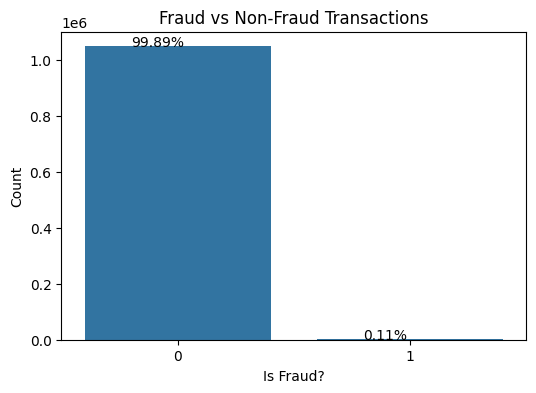

In [12]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x="isFraud", data=df)

# Add percentage labels
total = len(df)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.2f}%'
    ax.annotate(percentage, (p.get_x() + 0.2, p.get_height() + 50))

plt.title("Fraud vs Non-Fraud Transactions")
plt.xlabel("Is Fraud?")
plt.ylabel("Count")
plt.show()


C:\Users\Yash Shah\AppData\Local\Temp\ipykernel_7396\2144197474.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="type", data=df, palette="Set2")


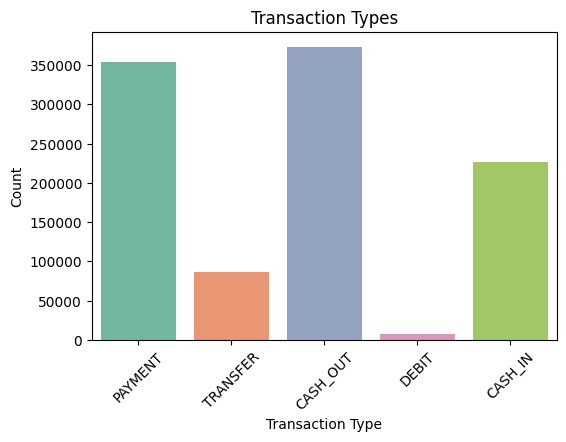

In [13]:
# how may type of transaction frequently
plt.figure(figsize=(6,4))
sns.countplot(x="type", data=df, palette="Set2")
plt.title("Transaction Types")
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.xticks(rotation=45)  # Rotate labels if needed
plt.show()


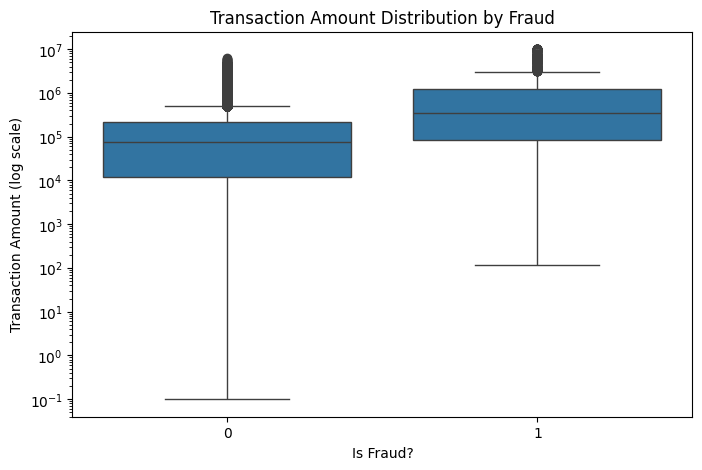

In [14]:
plt.figure(figsize=(8,5))
sns.boxplot(x="isFraud", y="amount", data=df)
plt.yscale("log")  # Log scale for better visualization
plt.title("Transaction Amount Distribution by Fraud")
plt.xlabel("Is Fraud?")
plt.ylabel("Transaction Amount (log scale)")
plt.show()


C:\Users\Yash Shah\AppData\Local\Temp\ipykernel_7396\1487841570.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
C:\Users\Yash Shah\AppData\Local\Temp\ipykernel_7396\1487841570.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(


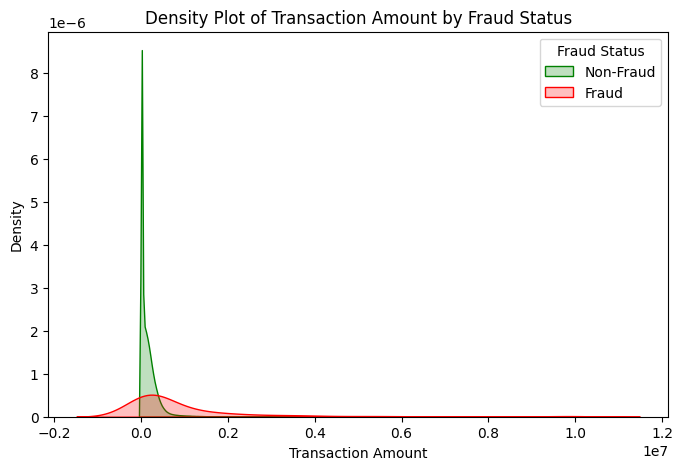

In [15]:
plt.figure(figsize=(8, 5))

# KDE plot for Non-Fraudulent transactions
sns.kdeplot(
    data=df[df["isFraud"] == 0], 
    x="amount", 
    label="Non-Fraud", 
    shade=True, 
    color="green"
)

# KDE plot for Fraudulent transactions
sns.kdeplot(
    data=df[df["isFraud"] == 1], 
    x="amount", 
    label="Fraud", 
    shade=True, 
    color="red"
)

# Add titles and labels
plt.title("Density Plot of Transaction Amount by Fraud Status")
plt.xlabel("Transaction Amount")
plt.ylabel("Density")
plt.legend(title="Fraud Status")

plt.show()



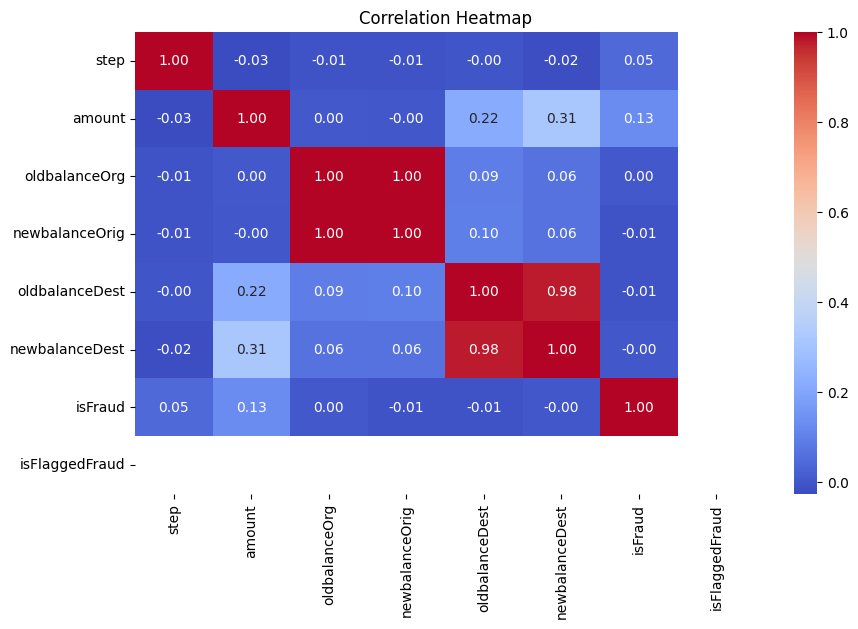

In [16]:
# Convert categorical columns to numeric using Label Encoding (or drop them if not needed)
df_numeric = df.select_dtypes(include=['number'])  # Keep only numeric columns

# Plot correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

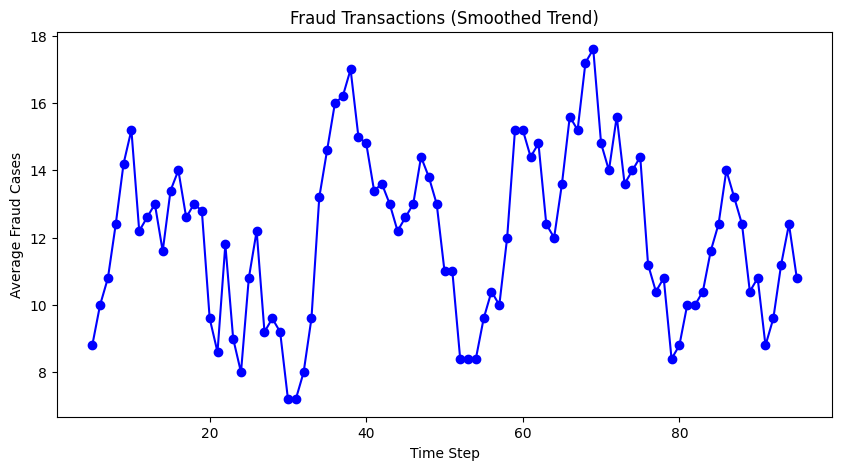

In [17]:
plt.figure(figsize=(10,5))
df.groupby("step")["isFraud"].sum().rolling(window=5).mean().plot(kind="line", marker="o", color="blue")
plt.title("Fraud Transactions (Smoothed Trend)")
plt.xlabel("Time Step")
plt.ylabel("Average Fraud Cases")
plt.show()


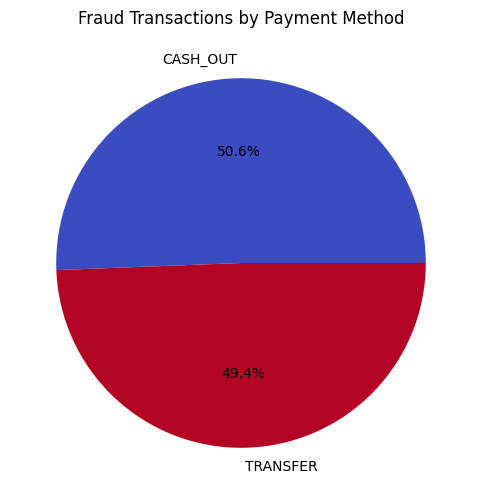

In [18]:
plt.figure(figsize=(6,6))
df[df["isFraud"] == 1]["type"].value_counts().plot(kind="pie", autopct="%1.1f%%", cmap="coolwarm")
plt.title("Fraud Transactions by Payment Method")
plt.ylabel("")
plt.show()


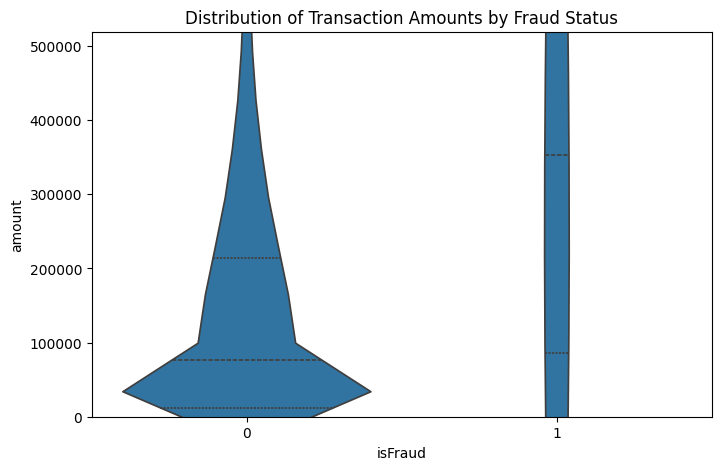

In [19]:
plt.figure(figsize=(8,5))
sns.violinplot(x="isFraud", y="amount", data=df, inner="quartile")
plt.title("Distribution of Transaction Amounts by Fraud Status")
plt.ylim([0, df['amount'].quantile(0.95)])
plt.show()


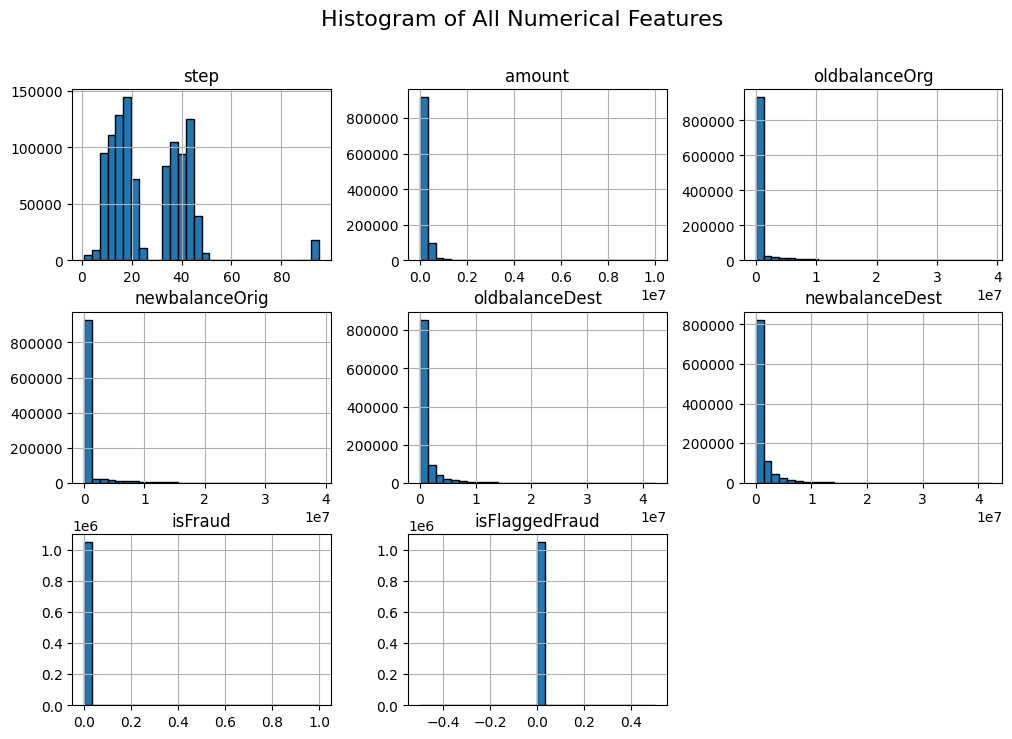

In [20]:
# Plot histograms for all numerical columns
df.hist(figsize=(12, 8), bins=30, grid=True, edgecolor='black', layout=(3, 3))
plt.suptitle("Histogram of All Numerical Features", fontsize=16)
plt.show()



C:\Users\Yash Shah\AppData\Local\Temp\ipykernel_7396\30316645.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x="isFraud", y="oldbalanceOrg", data=df, jitter=0.3, palette="coolwarm", alpha=0.5)


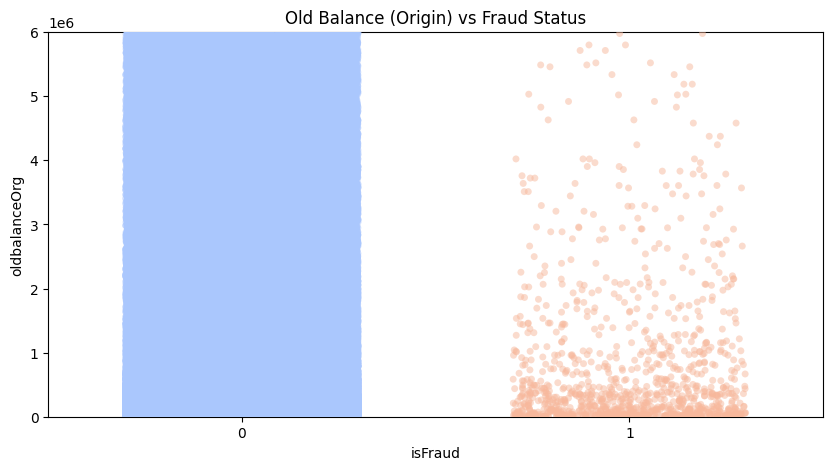

In [21]:
plt.figure(figsize=(10,5))
sns.stripplot(x="isFraud", y="oldbalanceOrg", data=df, jitter=0.3, palette="coolwarm", alpha=0.5)
plt.title("Old Balance (Origin) vs Fraud Status")
plt.ylim([0, df['oldbalanceOrg'].quantile(0.95)])
plt.show()


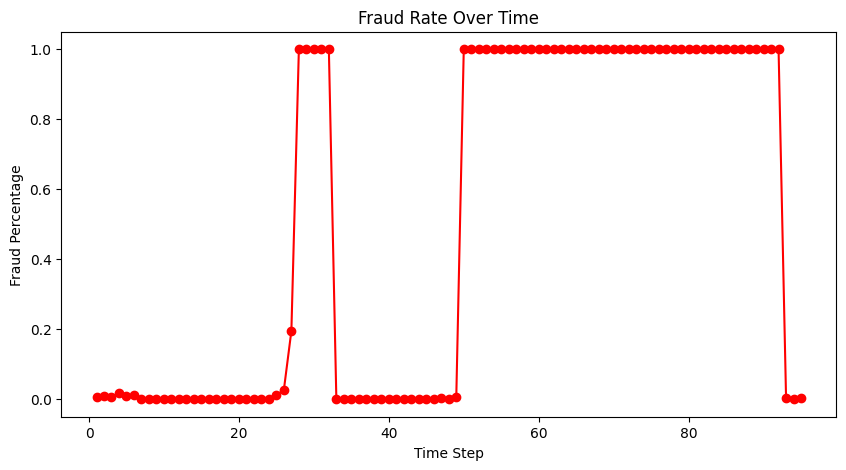

In [22]:
plt.figure(figsize=(10,5))
df.groupby("step")["isFraud"].mean().plot(kind="line", marker="o", color="red")
plt.title("Fraud Rate Over Time")
plt.xlabel("Time Step")
plt.ylabel("Fraud Percentage")
plt.show()


C:\Users\Yash Shah\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


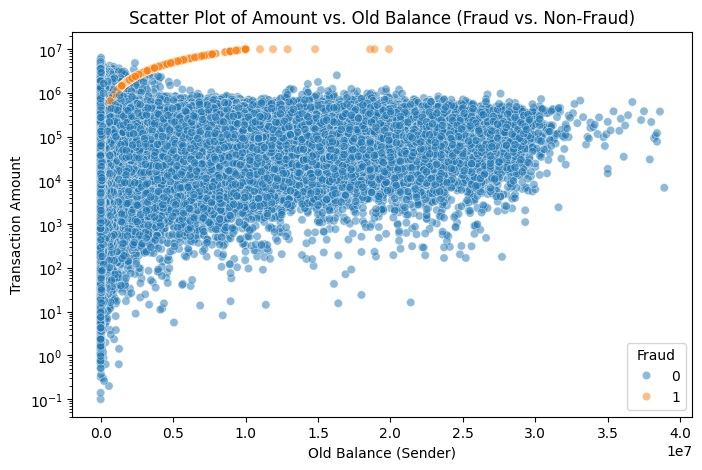

In [23]:
# Scatter plot of amount vs oldbalanceOrg, colored by isFraud
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["oldbalanceOrg"], y=df["amount"], hue=df["isFraud"], alpha=0.5)
plt.title("Scatter Plot of Amount vs. Old Balance (Fraud vs. Non-Fraud)")
plt.xlabel("Old Balance (Sender)")
plt.ylabel("Transaction Amount")
plt.yscale("log")  # Log scale for better visualization
plt.legend(title="Fraud")
plt.show()


C:\Users\Yash Shah\AppData\Local\Temp\ipykernel_7396\1413469002.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='isFraud', y='amount', data=df, palette='Set2')


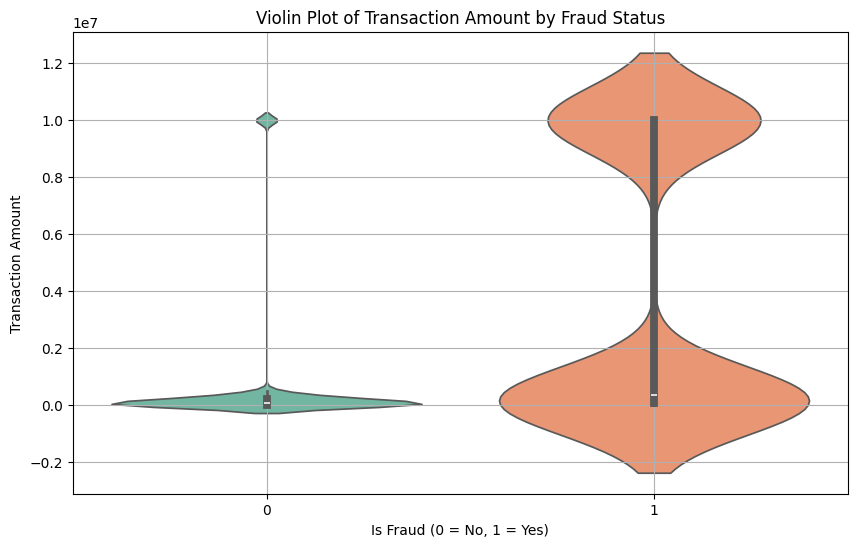

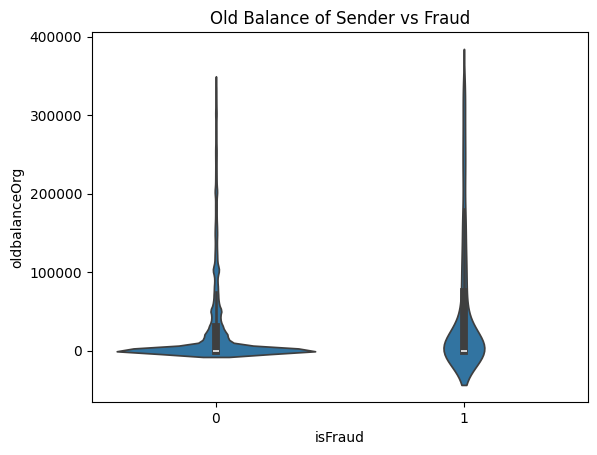

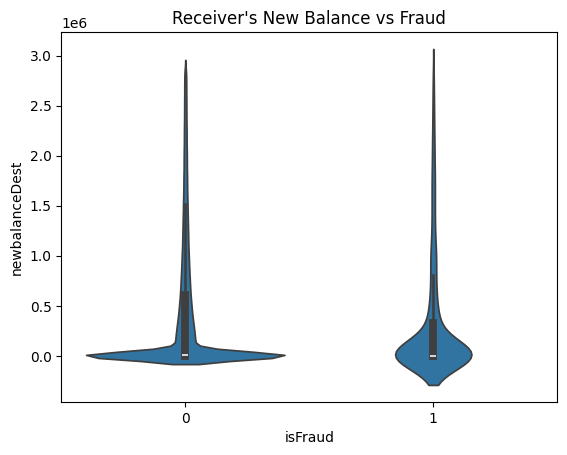

In [24]:
fraud_vs_nonfraud = df.groupby("type")["isFraud"].value_counts().unstack()
fraud_vs_nonfraud.columns = ["Non-Fraud", "Fraud"]
print(fraud_vs_nonfraud)


          Non-Fraud  Fraud
type                      
CASH_IN    227130.0    NaN
CASH_OUT   373063.0  578.0
DEBIT        7178.0    NaN
PAYMENT    353873.0    NaN
TRANSFER    86189.0  564.0


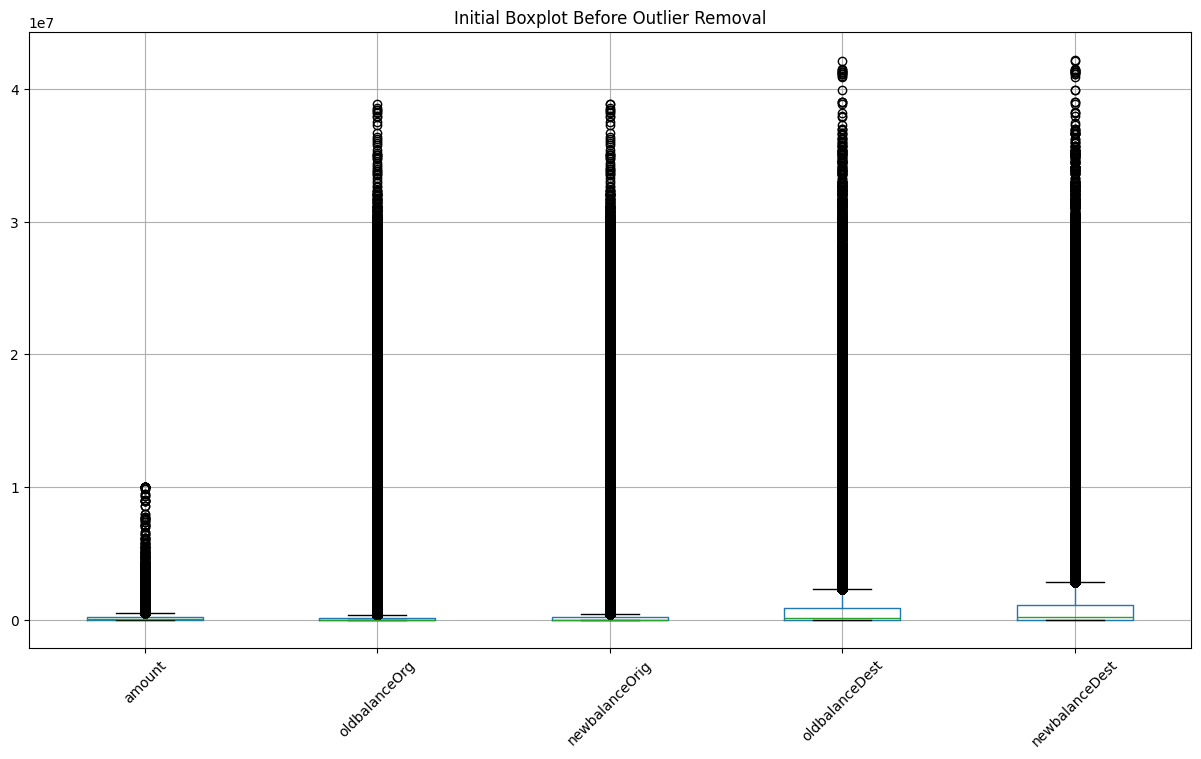

In [25]:
# Select numerical columns only
numeric_columns = df.select_dtypes(include=['float']).columns

# Plot boxplots for all numerical columns before outlier removal
plt.figure(figsize=(15, 8))
df[numeric_columns].boxplot(rot=45)
plt.title("Initial Boxplot Before Outlier Removal")
plt.show()

In [26]:
def replace_outliers_with_mode(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        # Define lower and upper bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Calculate mode (most frequent value)
        mode_value = df[col].mode()[0]  

        # Replace outliers with mode (modifying df in place)
        df.loc[(df[col] < lower_bound) | (df[col] > upper_bound), col] = mode_value
        
# Select numerical columns
numeric_amt = ["amount"]
# Apply outlier replacement in place
replace_outliers_with_mode(df, numeric_amt)

numeric_obo = ["oldbalanceOrg"]
replace_outliers_with_mode(df, numeric_obo)

numeric_obo = ["newbalanceOrig"]
replace_outliers_with_mode(df, numeric_obo)

numeric_obo = ["oldbalanceDest"]
replace_outliers_with_mode(df, numeric_obo)

numeric_obo = ["newbalanceDest"]
replace_outliers_with_mode(df, numeric_obo)



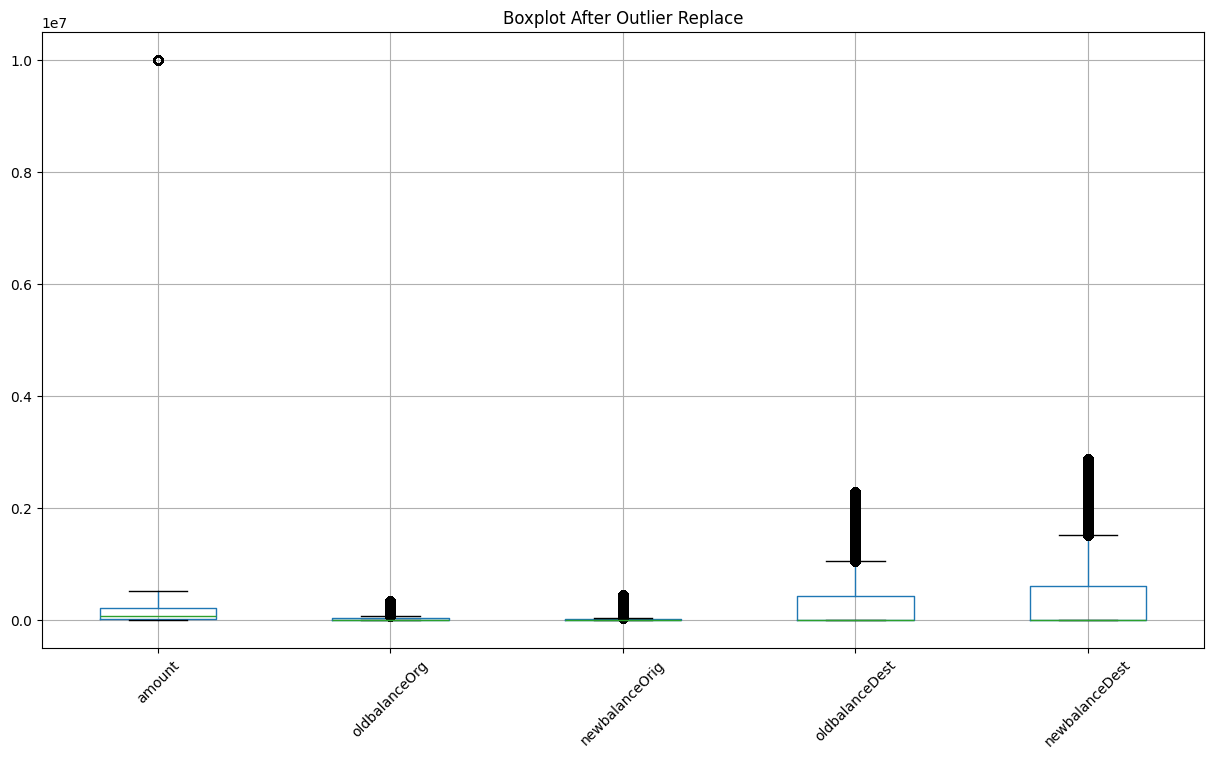

In [27]:
# Plot boxplots for all numerical columns after outlier removal
plt.figure(figsize=(15, 8))
df[numeric_columns].boxplot(rot=45)
plt.title("Boxplot After Outlier Replace")
plt.show()

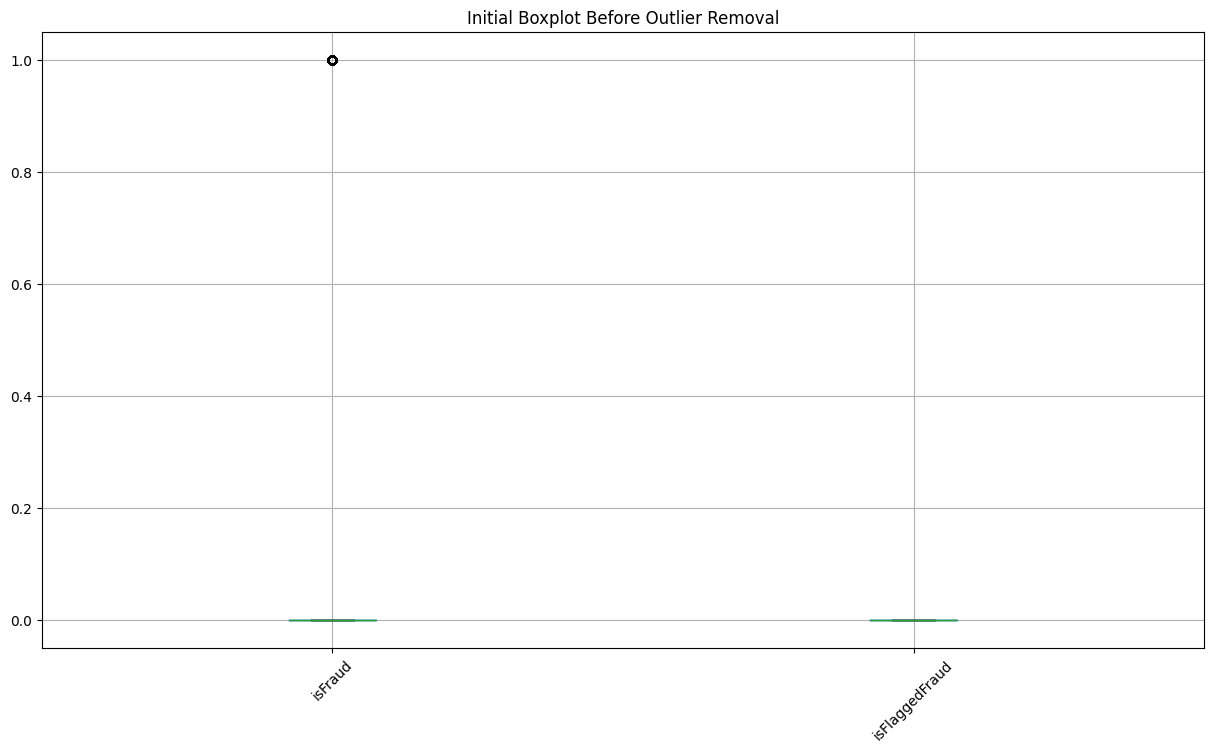

In [28]:
# Select only the 'isFraud' and 'isFlaggedFraud' columns
fraud_columns = ['isFraud', 'isFlaggedFraud']

# Plot boxplots for isfraud and isflaggesfraud columns before outlier removal
plt.figure(figsize=(15, 8))
df[fraud_columns].boxplot(rot=45)
plt.title("Initial Boxplot Before Outlier Removal")
plt.show()

In [29]:
df.drop(columns=['step', 'nameOrig', 'nameDest'], inplace=True)


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 8 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   type            1048575 non-null  object 
 1   amount          1048575 non-null  float64
 2   oldbalanceOrg   1048575 non-null  float64
 3   newbalanceOrig  1048575 non-null  float64
 4   oldbalanceDest  1048575 non-null  float64
 5   newbalanceDest  1048575 non-null  float64
 6   isFraud         1048575 non-null  int64  
 7   isFlaggedFraud  1048575 non-null  int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 64.0+ MB


In [31]:


# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Select categorical columns (object or string type)
categorical_columns = df.select_dtypes(include=['object']).columns

# Apply Label Encoding to each categorical column
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Display the first few rows after encoding
print(df.head())
 


   type    amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0     3   9839.64       170136.0       160296.36             0.0   
1     3   1864.28        21249.0        19384.72             0.0   
2     4    181.00          181.0            0.00             0.0   
3     1    181.00          181.0            0.00         21182.0   
4     3  11668.14        41554.0        29885.86             0.0   

   newbalanceDest  isFraud  isFlaggedFraud  
0             0.0        0               0  
1             0.0        0               0  
2             0.0        1               0  
3             0.0        1               0  
4             0.0        0               0  


In [32]:
# Define the target variable (replace 'target_column' with the actual column name)
target_column = 'isFraud'  # Change this to your actual target column

# Split data into X (features) and Y (target)
X = df.drop(columns=[target_column])  # Features (all columns except target)
y = df[target_column]  # Target variable

# Display the shapes of X and y
print(f"Shape of X: {X.shape}")
print(f"Shape of Y: {y.shape}")

Shape of X: (1048575, 7)
Shape of Y: (1048575,)


In [33]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Testing set: {X_test.shape}, {y_test.shape}")

Training set: (734002, 7), (734002,)
Testing set: (314573, 7), (314573,)


In [34]:
# y_train = y_train.astype(int)
# y_test = y_test.astype(int)


# Step 4: Train Logistic Regression model
model1 = LogisticRegression()
model1.fit(X_train, y_train)

c:\installed_soft\anaconda_setup\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [35]:
#Make predictions
y_pred1 = model1.predict(X_test)

#Evaluate the model
accuracy1 = accuracy_score(y_test, y_pred1)
print(f"Model Accuracy:",accuracy1*100)

Model Accuracy: 99.8890559583944


In [36]:


# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Train (fit) the model
dt_model.fit(X_train, y_train)




DecisionTreeClassifier(random_state=42)

In [37]:
y_pred_dt = dt_model.predict(X_test)


In [38]:
# Calculate accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt * 100:.2f}%")

Decision Tree Accuracy: 99.89%


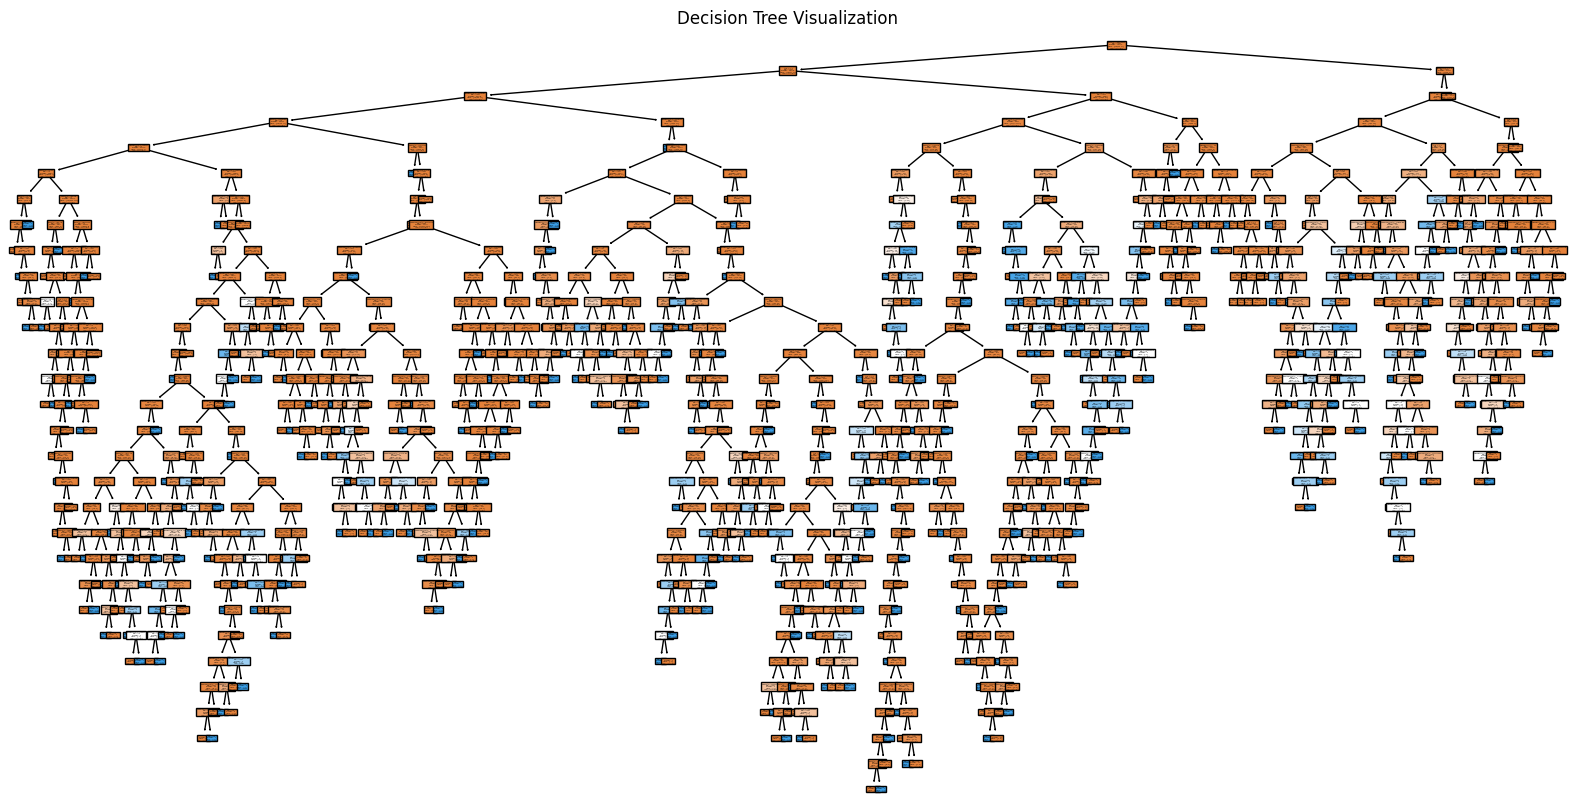

In [39]:


# Plot the decision tree
plt.figure(figsize=(20, 10))  # Adjust figure size for readability
plot_tree(dt_model, filled=True, feature_names=X.columns, class_names=['Not Fraud', 'Fraud'])
plt.title("Decision Tree Visualization")
plt.show()

In [40]:
# # Define the Neural Network
# model2 = keras.Sequential([
#     keras.layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer
#     keras.layers.Dense(16, activation='relu'),  # Hidden layer
#     keras.layers.Dense(8, activation='relu'),  # Hidden layer
#     keras.layers.Dense(1, activation='sigmoid')  # Output layer (binary classification)
# ])

# # Compile the model
# model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [41]:
# # Train the model
# model2.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


In [42]:
# # Evaluate on test data
# loss2, accuracy2 = model2.evaluate(X_test, y_test)
# print(f"Test Accuracy: {accuracy2 * 100:.2f}%")


In [52]:
from xgboost import XGBClassifier

model4 = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    
)

model4.fit(X_train, y_train)


y_pred4 = model4.predict(X_test)

accuracy4 = accuracy_score(y_test, y_pred4)
print(f"xgboost: {accuracy4 * 100:.2f}%")


xgboost: 99.92%


xgboost: 99.92%
